### <font color = 'purple'> Predictive Model for determining the chances of a graduate admission for overseas scholarship

###### Prepared by; `Olanrewaju Adegoke`

###### Email: `larrysman2004@yahoo.com`

###### Import the necessary libraries 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

###### Define the paths to the folders

In [2]:
main = 'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\admission_chances_prediction_project'
data = '../data'
model_path = '../models'
notebk = '../notebooks'
output = '../outputs'
resource = '../resources'
visual = '../visuals'

###### Load the dataset 

In [3]:
os.getcwd()

'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\admission_chances_prediction_project\\notebooks'

In [4]:
os.chdir(data)

In [5]:
df = pd.read_csv('admission_data.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
os.chdir(notebk)

###### Explore the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


There is no missing values and the dataset are all numerical.

In [8]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


The dataset is relatively normal only that we would be standardizing it using the standard scaler.

In [9]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

###### Renaming the column names

In [12]:
df.columns = ['serial_no', 'GRE_score', 'TOEFL_score', 'University_rating', 'SOP', 'LOR', 'CGPA', 'Num_of_publication', 'Admittance_ratio']

In [13]:
df.head()

,serial_no,GRE_score,TOEFL_score,University_rating,SOP,LOR,CGPA,Num_of_publication,Admittance_ratio
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


###### Drop the unwanted column

In [14]:
df.drop('serial_no', axis=1, inplace=True)
df.head(2)

,GRE_score,TOEFL_score,University_rating,SOP,LOR,CGPA,Num_of_publication,Admittance_ratio
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76


###### Make a copy of the dataset

In [15]:
data = df.copy()

###### Correlation Analysis

Correlation is a statistical measure that quantifies the relationship between two variables. In machine learning and AI, understanding correlations is crucial for feature selection, data preprocessing, and model evaluation.

In [16]:
df.corr()

,GRE_score,TOEFL_score,University_rating,SOP,LOR,CGPA,Num_of_publication,Admittance_ratio
GRE_score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL_score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University_rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Num_of_publication,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Admittance_ratio,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


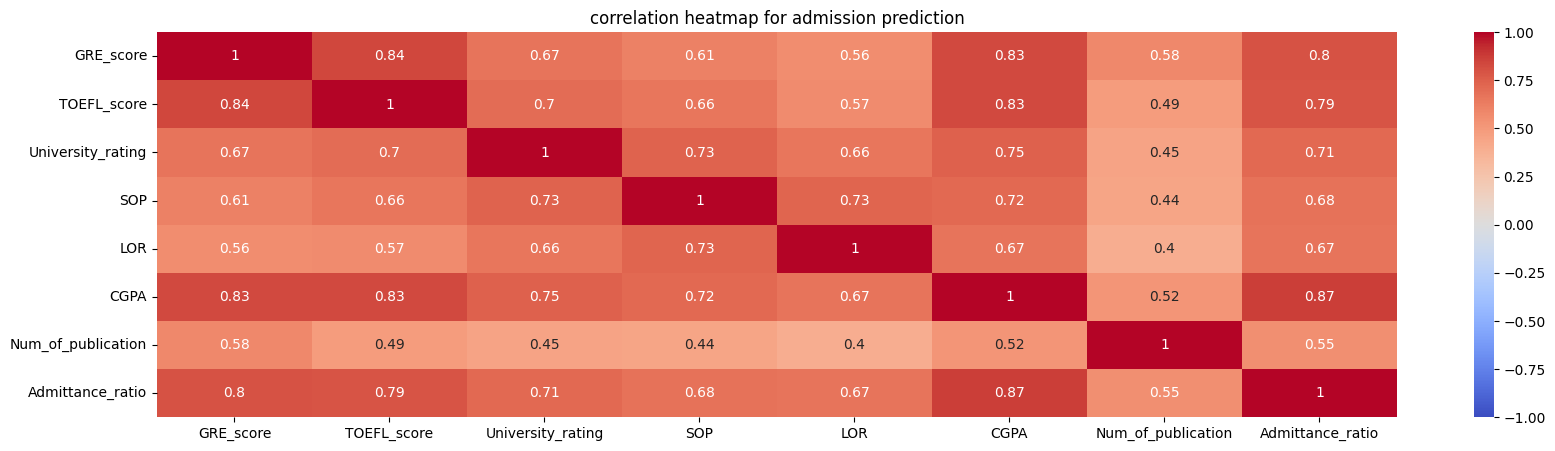

In [17]:
plt.figure(figsize=(20, 5))
sb.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('correlation heatmap for admission prediction')
plt.show()

In [18]:
df.corr(method='spearman')

,GRE_score,TOEFL_score,University_rating,SOP,LOR,CGPA,Num_of_publication,Admittance_ratio
GRE_score,1.000000,0.831860,0.676265,0.613743,0.547786,0.831848,0.595911,0.815352
TOEFL_score,0.831860,1.000000,0.696868,0.652922,0.549405,0.825720,0.504322,0.795573
University_rating,0.676265,0.696868,1.000000,0.740387,0.653256,0.750562,0.454131,0.731977
SOP,0.613743,0.652922,0.740387,1.000000,0.727178,0.724348,0.443648,0.694715
LOR,0.547786,0.549405,0.653256,0.727178,1.000000,0.666012,0.400385,0.670562
CGPA,0.831848,0.825720,0.750562,0.724348,0.666012,1.000000,0.530265,0.878403
Num_of_publication,0.595911,0.504322,0.454131,0.443648,0.400385,0.530265,1.000000,0.581742
Admittance_ratio,0.815352,0.795573,0.731977,0.694715,0.670562,0.878403,0.581742,1.000000


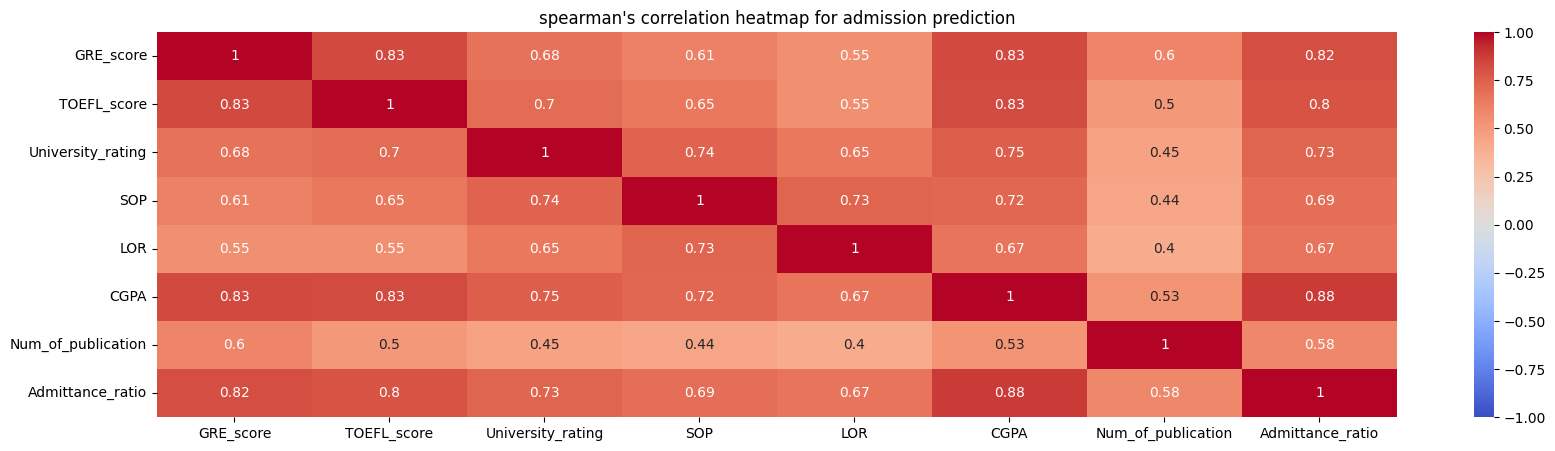

In [19]:
plt.figure(figsize=(20, 5))
sb.heatmap(df.corr(method='spearman'), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title("spearman's correlation heatmap for admission prediction")
plt.show()

we can observe the columns that are strongly correlated with the target variable - `Admittance_ratio`.

### Mutual Information:
Mutual Information is a measure of the mutual dependence between two variables. It quantifies the amount of information obtained about one variable by observing the other.

This metric is particularly useful in machine learning for `feature selection` and `understanding non-linear relationships` between variables.

In [20]:
from sklearn.feature_selection import mutual_info_regression

In [21]:
x = df.drop(columns=['Admittance_ratio'])
x.head(2)

,GRE_score,TOEFL_score,University_rating,SOP,LOR,CGPA,Num_of_publication
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1


In [22]:
y = df[['Admittance_ratio']]
y.head(2)

,Admittance_ratio
0,0.92
1,0.76


In [23]:
seed = 42

In [24]:
mutual_score = mutual_info_regression(x, y, random_state=seed)
mutual_score

C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.65743196, 0.59659725, 0.42859612, 0.37781168, 0.29967344,
       0.95964032, 0.19003154])

In [25]:
score = np.round(mutual_score*100,2)
score

array([65.74, 59.66, 42.86, 37.78, 29.97, 95.96, 19.  ])

In [26]:
important_features = pd.DataFrame(score.reshape(1,7), columns=x.columns)

In [27]:
important_features

,GRE_score,TOEFL_score,University_rating,SOP,LOR,CGPA,Num_of_publication
0,65.74,59.66,42.86,37.78,29.97,95.96,19.0


According to the mutual information, the important features are: `CGPA`, `GRE_score`, and `TOEFL_score` with `University_ranking, SOP, LOR and Num_of_publication` having lower impact.

##### Visualizing Feature Importances for Features Selection

In [28]:
def plot_feature_importances(importances, feature_names):
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(20, 5))
    plt.xlabel('The features')
    plt.ylabel('The proportion of feature importance')
    plt.title('Feature Selection with Importance (Mutual Information Method)')
    plt.bar(range(len(importances)), importances[indices])
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

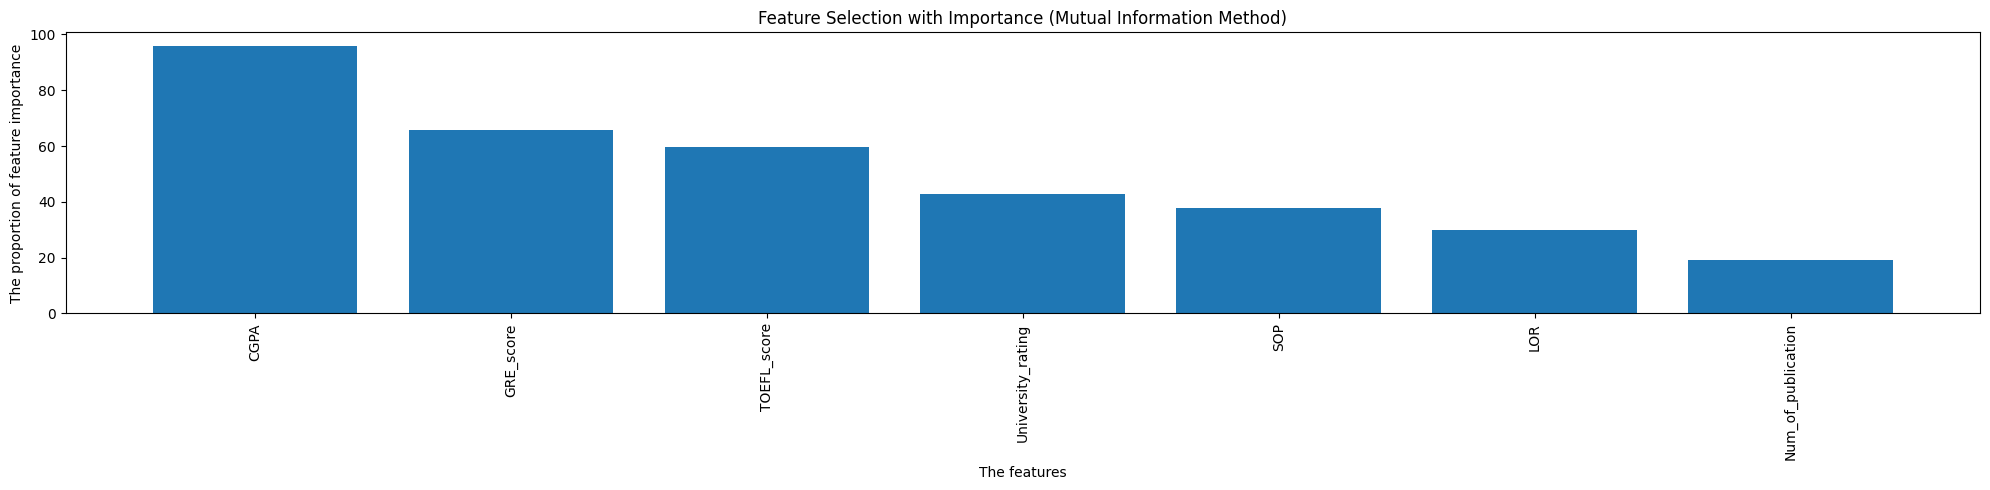

In [29]:
importances = score
feature_names = list(x.columns)
plot_feature_importances(importances, feature_names)

We observed that the most important features are `CGPA, GRE_score, and TOEFL_score` with over 60.0% contribution to predicting the `Admittance_ratio`.

###### GROUP BY ANALYSIS

In [30]:
grp_by_GRE = df.groupby(df['GRE_score']).mean()

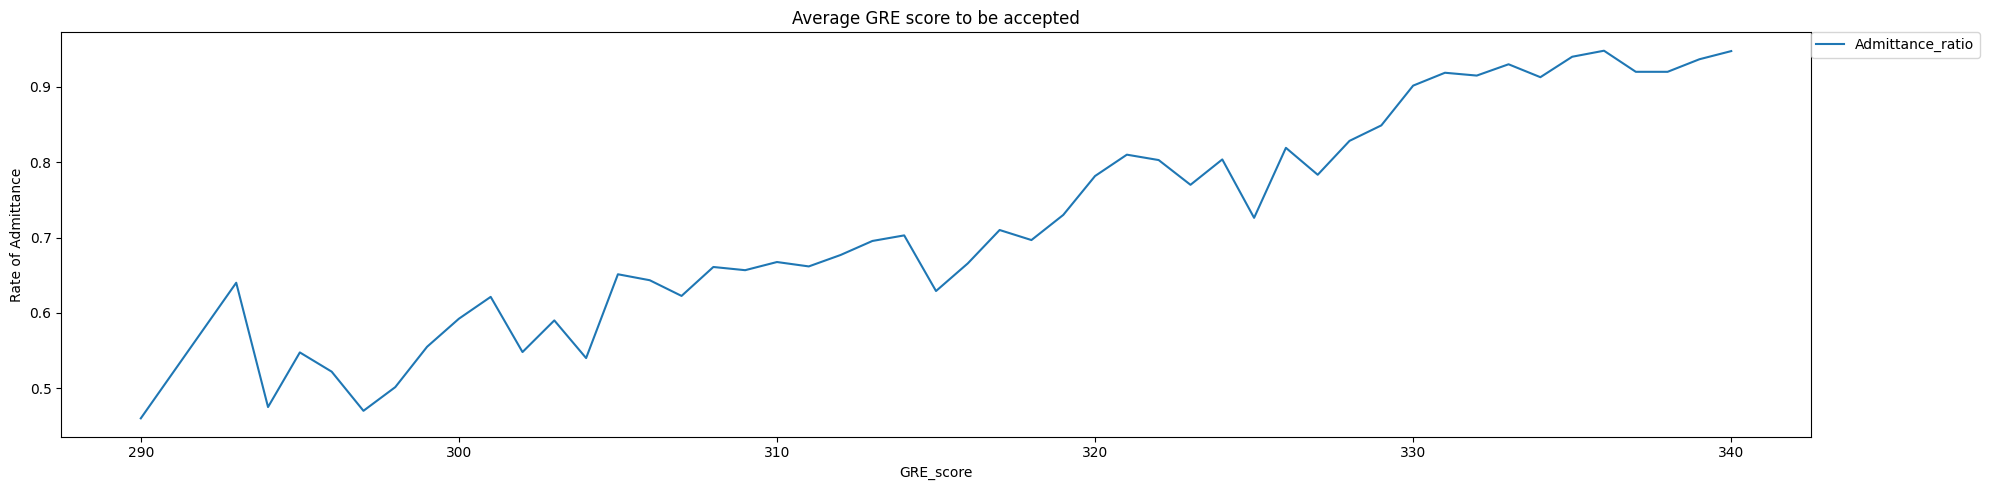

In [31]:
plt.figure(figsize=(20, 5))
grp_by_GRE['Admittance_ratio'].plot()
plt.ylabel('Rate of Admittance')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)
plt.title('Average GRE score to be accepted')
plt.tight_layout()
plt.show()

Candidate with average GRE score have higher chances of been admitted. With the following averages:
grp_by_GRE.mean().

There is a linear relationship between admittance ratio and the GRE score a student get to be admitted. The higher the GRE score the better.

In [32]:
grp_by_CGPA = df.groupby(df['CGPA']).mean()

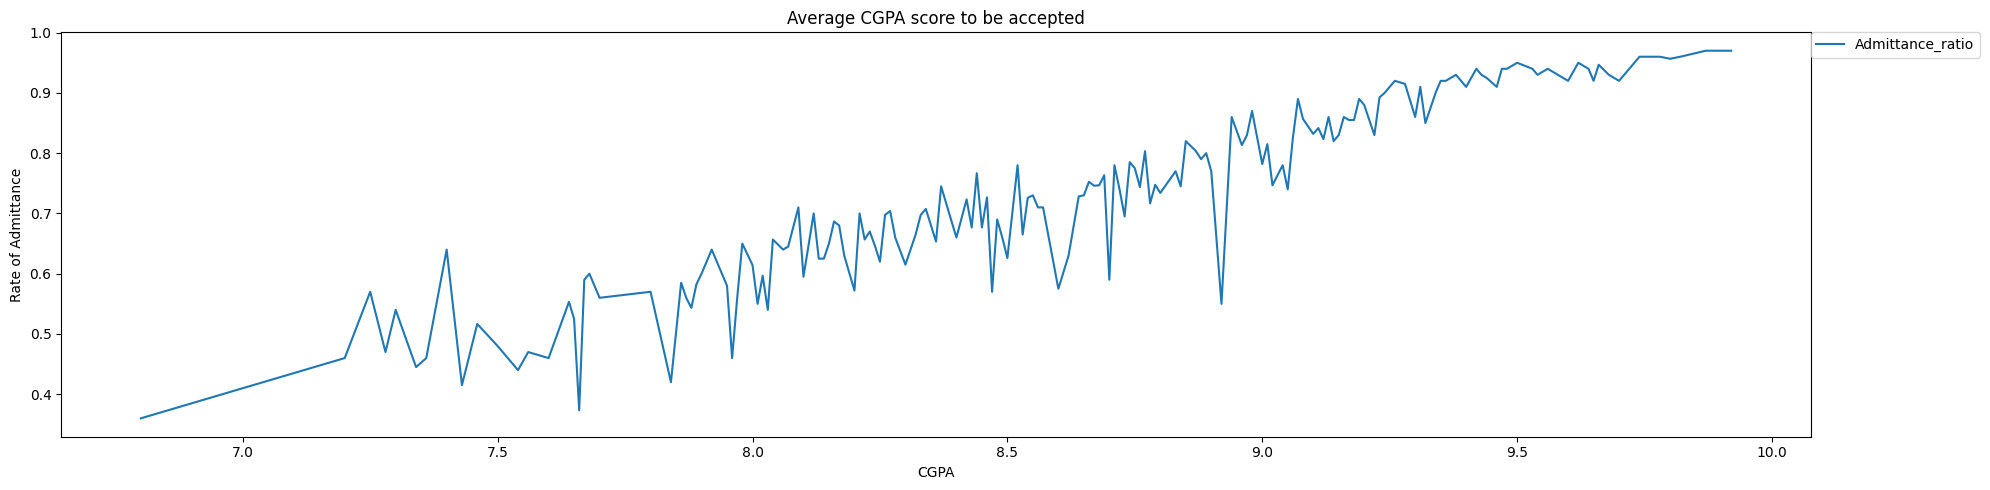

In [33]:
plt.figure(figsize=(20, 5))
grp_by_CGPA['Admittance_ratio'].plot()
plt.ylabel('Rate of Admittance')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)
plt.title('Average CGPA score to be accepted')
plt.tight_layout()
plt.show()

There is a linear relationship between admittance ratio and the CGPA score a student get to be admitted. The higher the CGPA score the better.

In [34]:
grp_by_TOEFL = df.groupby(df['TOEFL_score']).mean()

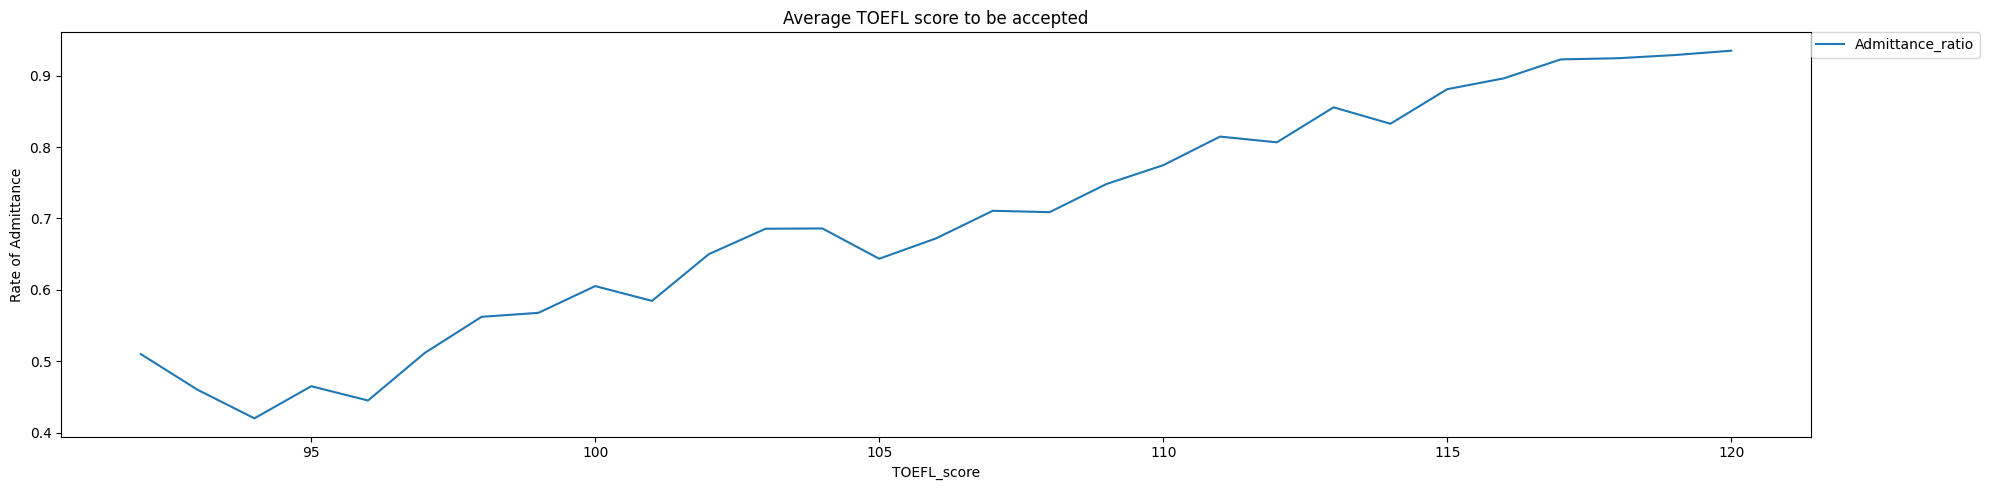

In [35]:
plt.figure(figsize=(20, 5))
grp_by_TOEFL['Admittance_ratio'].plot()
plt.ylabel('Rate of Admittance')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)
plt.title('Average TOEFL score to be accepted')
plt.tight_layout()
plt.show()

There is a linear relationship between admittance ratio and the TOEFL score a student get to be admitted. The higher the TOEFL score the better.

<Axes: ylabel='Admittance_ratio'>

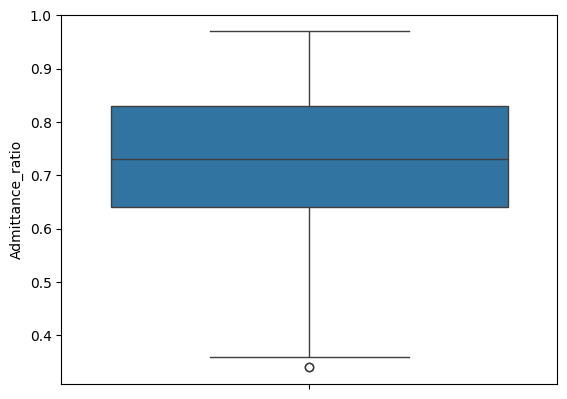

In [36]:
sb.boxplot(df.Admittance_ratio)

#### Predictive Modeling

In [37]:
df.head()

,GRE_score,TOEFL_score,University_rating,SOP,LOR,CGPA,Num_of_publication,Admittance_ratio
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [38]:
features = df.drop(columns=['Admittance_ratio'])
target = df[['Admittance_ratio']]

###### Transform the numerical features

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

def standard_scaler_transform(features):
    '''
    This function transform the numerical columns into transformed values using all the sklearn preprocessing libraries.
    This will transform the pandas dataframe by standardscaler.
    Input:
        features: This is pandas dataframe containing ONLY the numerical columns.
    Output:
        This returns the transformed pandas dataframe for numerical columns in the dataset.
    '''
    X = scaler.fit_transform(features)
    X = pd.DataFrame(X, columns=list(features.columns))
    return scaler, X

In [40]:
features = features
scaler, scaled_feat =  standard_scaler_transform(features)

In [41]:
scaler

StandardScaler()

In [42]:
scaled_feat.head()

,GRE_score,TOEFL_score,University_rating,SOP,LOR,CGPA,Num_of_publication
0,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818,0.909112
1,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151,0.909112
2,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631,0.909112
3,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339,0.909112
4,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029,-1.099975


###### Resize the target

In [43]:
target = target.reset_index(drop=True)

###### Concatenate the transformed data

In [44]:
cleaned_df = pd.concat([scaled_feat, target], axis=1)
cleaned_df.head()

,GRE_score,TOEFL_score,University_rating,SOP,LOR,CGPA,Num_of_publication,Admittance_ratio
0,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818,0.909112,0.92
1,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151,0.909112,0.76
2,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631,0.909112,0.72
3,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339,0.909112,0.80
4,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029,-1.099975,0.65


###### Train_Test_Split the dataset, build and evaluate the model performance

In [45]:
from sklearn.model_selection import train_test_split
def train_test_splitting(df, target_col, test_size, seed):
    features = df.drop(columns=[target_col])
    target = df[[target_col]]
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=test_size, random_state=seed)
    return X_train, X_test, y_train, y_test  

In [46]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

def model_training_evaluation(df, target_col, test_size, seed, model):
    
    X_train, X_test, y_train, y_test = train_test_splitting(df, target_col, test_size, seed)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"The mean_squared_error is {round(mse,2)}")
    print(f"The root_mean_squared_error is {round(rmse,2)}")
    print(f"The mean_absolute_error is {round(mae,2)}")
    print(f"The r2_score is {round(r2,4) * 100}%")
    
    return model, y_pred

In [47]:
from sklearn.ensemble import RandomForestRegressor

df = cleaned_df
target_col = 'Admittance_ratio'
test_size = 0.01
seed = 42
num_estimator = 100
model = RandomForestRegressor(n_estimators=num_estimator, random_state=seed)
model, y_pred = model_training_evaluation(df, target_col, test_size, seed, model)

C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


The mean_squared_error is 0.0
The root_mean_squared_error is 0.03
The mean_absolute_error is 0.03
The r2_score is 88.8%


###### Hyperparametrized the RandomForestRegressor

In [48]:
from sklearn.model_selection import ShuffleSplit
num_splits = 5
test_size = 0.01
seed = 42
cv = ShuffleSplit(n_splits=num_splits, test_size=test_size, random_state=seed)
cv

ShuffleSplit(n_splits=5, random_state=42, test_size=0.01, train_size=None)

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

###### Instantiate the instance of the base model

In [50]:
rf = RandomForestRegressor()

###### Define the tunning parameters

In [51]:
seed = [30, 42]
num_estimators = [400, 500]
#max_depth = [8]

###### Define the parameter grid

In [52]:
param_grid = {
    'n_estimators':num_estimators,
    #'max_depth':max_depth,
    'random_state':seed
}

###### Instantiate the rf model with the GRIDSEARCHCV

In [53]:
rf_gridCV = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5
)

In [54]:
rf_gridCV

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [400, 500], 'random_state': [30, 42]},
             scoring='neg_mean_squared_error')

###### Fit the model with the GRIDSEARCHCV

In [55]:
df = cleaned_df
target_col = 'Admittance_ratio'
test_size = 0.01
seed = 42
X_train, X_test, y_train, y_test  = train_test_splitting(df, target_col, test_size, seed)

In [56]:
%%time
rf_gridCV.fit(X_train, y_train)

C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: 

CPU times: total: 15.3 s
Wall time: 17.6 s


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [400, 500], 'random_state': [30, 42]},
             scoring='neg_mean_squared_error')

###### Accessing best estimator and parameters

In [57]:
rf_gridCV.best_estimator_

RandomForestRegressor(n_estimators=400, random_state=42)

In [58]:
rf_gridCV.best_params_

{'n_estimators': 400, 'random_state': 42}

###### Grab the best model for rf

In [59]:
rf_model_best = rf_gridCV.best_estimator_

###### Make predictions with the model

In [60]:
y_pred_best = rf_model_best.predict(X_test)
y_pred_best

array([0.672975, 0.711175, 0.933475, 0.819175])

In [61]:
y_pred_best_df = pd.DataFrame(y_pred_best, columns=list(y_test.columns))
y_pred_best_df.head()

,Admittance_ratio
0,0.672975
1,0.711175
2,0.933475
3,0.819175


###### Evaluation the model

In [62]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

def model_evaluation():
    mse = mean_squared_error(y_test, y_pred_best)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred_best)
    r2 = r2_score(y_test, y_pred_best)
    
    print(f"The mean_squared_error is {round(mse,2)}")
    print(f"The root_mean_squared_error is {round(rmse,2)}")
    print(f"The mean_absolute_error is {round(mae,2)}")
    print(f"The r2_score is {round(r2,4) * 100}%")

In [63]:
model_evaluation()

The mean_squared_error is 0.0
The root_mean_squared_error is 0.03
The mean_absolute_error is 0.03
The r2_score is 91.01%


###### Using the boosting regressor

In [64]:
from xgboost import XGBRegressor

In [65]:
%%time
df = cleaned_df
target_col = 'Admittance_ratio'
test_size = 0.01
seed = 42
num_estimator = 100
model = XGBRegressor(n_estimators=num_estimator, random_state=seed)
model, y_pred = model_training_evaluation(df, target_col, test_size, seed, model)

The mean_squared_error is 0.0
The root_mean_squared_error is 0.03
The mean_absolute_error is 0.03
The r2_score is 85.42%
CPU times: total: 531 ms
Wall time: 111 ms


In [66]:
features.columns

Index(['GRE_score', 'TOEFL_score', 'University_rating', 'SOP', 'LOR', 'CGPA',
       'Num_of_publication'],
      dtype='object')

###### Model Inferencing

In [67]:
scaler
rf_model_best

def preprocessing_and_prediction(GRE_score, TOEFL_score, University_rating, SOP, LOR, CGPA, Num_of_publication):
    cols = ['GRE_score', 'TOEFL_score', 'University_rating', 'SOP', 'LOR', 'CGPA', 'Num_of_publication']
    input_data = np.array([[GRE_score, TOEFL_score, University_rating, SOP, LOR, CGPA, Num_of_publication]])
    input_df = pd.DataFrame(input_data, columns=cols)
    num_data = scaler.transform(input_df)
    num_df = pd.DataFrame(num_data, columns=list(input_df.columns))
    predictions = rf_model_best.predict(num_df)
    pred_df = pd.DataFrame(predictions, columns=['Admittance_chances'])
    output = pd.concat([input_df, pred_df], axis=1)
    pred = predictions[0]
    return output   

In [68]:
feat = features.values
feat

array([[337.  , 118.  ,   4.  , ...,   4.5 ,   9.65,   1.  ],
       [324.  , 107.  ,   4.  , ...,   4.5 ,   8.87,   1.  ],
       [316.  , 104.  ,   3.  , ...,   3.5 ,   8.  ,   1.  ],
       ...,
       [330.  , 116.  ,   4.  , ...,   4.5 ,   9.45,   1.  ],
       [312.  , 103.  ,   3.  , ...,   4.  ,   8.78,   0.  ],
       [333.  , 117.  ,   4.  , ...,   4.  ,   9.66,   1.  ]])

In [69]:
sample = feat[0, :]
sample

array([337.  , 118.  ,   4.  ,   4.5 ,   4.5 ,   9.65,   1.  ])

In [70]:
GRE_score, TOEFL_score, University_rating, SOP, LOR, CGPA, Num_of_publication = sample

In [71]:
output = preprocessing_and_prediction(GRE_score, TOEFL_score, University_rating, SOP, LOR, CGPA, Num_of_publication)

In [72]:
output

,GRE_score,TOEFL_score,University_rating,SOP,LOR,CGPA,Num_of_publication,Admittance_chances
0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.928575


###### Inferencing Pipeline

In [73]:
scaler
rf_model_best

def preprocessing_and_prediction(GRE_score, TOEFL_score, University_rating, SOP, LOR, CGPA, Num_of_publication):
    cols = ['GRE_score', 'TOEFL_score', 'University_rating', 'SOP', 'LOR', 'CGPA', 'Num_of_publication']
    input_data = np.array([[GRE_score, TOEFL_score, University_rating, SOP, LOR, CGPA, Num_of_publication]])
    input_df = pd.DataFrame(input_data, columns=cols)
    num_data = scaler.transform(input_df)
    num_df = pd.DataFrame(num_data, columns=list(input_df.columns))
    predictions = rf_model_best.predict(num_df)
    pred_df = pd.DataFrame(predictions, columns=['Admittance_chances'])
    output = pd.concat([input_df, pred_df], axis=1)
    pred = predictions[0]
    return round(pred*100, 2)   

In [74]:
pred = preprocessing_and_prediction(GRE_score, TOEFL_score, University_rating, SOP, LOR, CGPA, Num_of_publication)

In [75]:
print(f'The admittance chances is: {pred}%')

The admittance chances is: 92.86%


###### Saving the best model, which is random forest regressor hyperparameterized

In [76]:
import pickle

In [77]:
os.chdir(model_path)

In [78]:
model_and_prep = {'model': rf_model_best, 'scaler': scaler}
with open('model_preprocessing_steps_admission.pkl', 'wb') as file:
    pickle.dump(model_and_prep, file)

In [79]:
os.chdir(notebk)

#### Admission Model Industrialization

###### Load the saved model

In [80]:
os.chdir(model_path)

In [81]:
with open('model_preprocessing_steps_admission.pkl', 'rb') as file:
    inference = pickle.load(file)

In [82]:
os.chdir(notebk)

###### Accessing the instances of the saved model and preprocessing steps

In [83]:
production_model = inference['model']
production_prep = inference['scaler']

###### Industrializing the model with Gradio

###### Define the function for preprocessing and inference

In [84]:
features.columns

Index(['GRE_score', 'TOEFL_score', 'University_rating', 'SOP', 'LOR', 'CGPA',
       'Num_of_publication'],
      dtype='object')

In [85]:
production_model
production_prep

def preprocessing_and_prediction(GRE_score, TOEFL_score, University_rating, SOP, LOR, CGPA, Num_of_publication):
    cols = ['GRE_score', 'TOEFL_score', 'University_rating', 'SOP', 'LOR', 'CGPA', 'Num_of_publication']
    input_data = np.array([[GRE_score, TOEFL_score, University_rating, SOP, LOR, CGPA, Num_of_publication]])
    input_df = pd.DataFrame(input_data, columns=cols)
    num_data = production_prep.transform(input_df)
    num_df = pd.DataFrame(num_data, columns=list(input_df.columns))
    predictions = production_model.predict(num_df)
    pred_df = pd.DataFrame(predictions, columns=['Admittance_chances'])
    output = pd.concat([input_df, pred_df], axis=1)
    pred = pd.DataFrame({'admittance_chances %': [predictions[0]]})
    pred = round(pred*100, 2)
    return pred

###### Import Gradio

In [86]:
import gradio as gr

C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


###### Generating sample data for the deployment

In [87]:
feat = features.values

sample = [list(data) for data in feat[0:1, :]]
print('total sample points: ',len(sample[0]))
print('total sample data: ',len(sample))

total sample points:  7
total sample data:  1


In [88]:
sample_data = sample

inputs = [
    gr.Number(label='GRE_score'),
    gr.Number(label='TOEFL_score'),
    gr.Number(label='University_rating'),
    gr.Number(label='SOP'),
    gr.Number(label='LOR'),
    gr.Number(label='CGPA'),
    gr.Number(label='Num_of_publication')
]

outputs = [gr.Dataframe(row_count = (1, "dynamic"), col_count=(1, "fixed"), label="Chances of Admission", headers=['Admittance_ratio'])]

title='Admittance chances for prospective candidate into graduate school for KEMPITES by Dekemp-Anythingondata'
description='Supply the inputs (see sample data) to determine your eligibilty based on your credentials. Note that: University_rating, SOP and LOR are rated over 5. Convert CGPA by (CGPA/GradingScale)*10.'

interface = gr.Interface(
    fn = preprocessing_and_prediction, inputs = inputs, outputs = outputs, title=title, description=description, examples=sample_data
)

interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://3619f93e66010c2154.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


### <font color='purple'> Using the Features Selection by Mutual Information Techniques

In [89]:
data.head(2)

,GRE_score,TOEFL_score,University_rating,SOP,LOR,CGPA,Num_of_publication,Admittance_ratio
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76


###### columns to consider based on importance

In [90]:
importance_cols = ['CGPA', 'GRE_score', 'TOEFL_score', 'Admittance_ratio']

In [91]:
imp_df = data[importance_cols]
imp_df.head()

,CGPA,GRE_score,TOEFL_score,Admittance_ratio
0,9.65,337,118,0.92
1,8.87,324,107,0.76
2,8.00,316,104,0.72
3,8.67,322,110,0.80
4,8.21,314,103,0.65


In [92]:
imp_df.describe()

,CGPA,GRE_score,TOEFL_score,Admittance_ratio
count,400.000000,400.000000,400.000000,400.000000
mean,8.598925,316.807500,107.410000,0.724350
std,0.596317,11.473646,6.069514,0.142609
min,6.800000,290.000000,92.000000,0.340000
25%,8.170000,308.000000,103.000000,0.640000
50%,8.610000,317.000000,107.000000,0.730000
75%,9.062500,325.000000,112.000000,0.830000
max,9.920000,340.000000,120.000000,0.970000


###### Select features and target

In [93]:
imp_features = imp_df.drop(columns=['Admittance_ratio'])
imp_target = imp_df[['Admittance_ratio']]

###### Preprocessing the Numerical columns

In [94]:
from sklearn.preprocessing import StandardScaler

imp_scaler = StandardScaler()

def imp_standard_scaler_transform(features):
    '''
    This function transform the numerical columns into transformed values using all the sklearn preprocessing libraries.
    This will transform the pandas dataframe by standardscaler.
    Input:
        features: This is pandas dataframe containing ONLY the numerical columns.
    Output:
        This returns the transformed pandas dataframe for numerical columns in the dataset.
    '''
    X = imp_scaler.fit_transform(features)
    X = pd.DataFrame(X, columns=list(features.columns))
    return imp_scaler, X

In [95]:
features = imp_features
imp_scaler, feat_scaled = imp_standard_scaler_transform(features)

In [96]:
imp_scaler

StandardScaler()

In [97]:
feat_scaled.head()

,CGPA,GRE_score,TOEFL_score
0,1.764818,1.762107,1.746971
1,0.455151,0.627656,-0.067635
2,-1.005631,-0.070467,-0.562528
3,0.119339,0.453126,0.427257
4,-0.653029,-0.244998,-0.727492


###### Resize the target

In [98]:
imp_target = imp_target.reset_index(drop=True)

###### Concatenate the transformed dataset

In [99]:
imp_cleaned_df = pd.concat([feat_scaled, target], axis=1)

imp_cleaned_df.head()

,CGPA,GRE_score,TOEFL_score,Admittance_ratio
0,1.764818,1.762107,1.746971,0.92
1,0.455151,0.627656,-0.067635,0.76
2,-1.005631,-0.070467,-0.562528,0.72
3,0.119339,0.453126,0.427257,0.80
4,-0.653029,-0.244998,-0.727492,0.65


###### Train and Evaluate the model using existing function

In [100]:
from sklearn.ensemble import RandomForestRegressor

df = imp_cleaned_df
target_col = 'Admittance_ratio'
test_size = 0.01
seed = 42
num_estimator = 100
model = RandomForestRegressor(n_estimators=num_estimator, random_state=seed)
imp_model, imp_y_pred = model_training_evaluation(df, target_col, test_size, seed, model)

C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


The mean_squared_error is 0.0
The root_mean_squared_error is 0.03
The mean_absolute_error is 0.02
The r2_score is 92.12%


In [101]:
imp_model

RandomForestRegressor(random_state=42)

##### Hyperparametrizing the model

###### Cross_Validation

In [102]:
from sklearn.model_selection import ShuffleSplit
num_splits = 5
test_size = 0.01
seed = 42
cv = ShuffleSplit(n_splits=num_splits, test_size=test_size, random_state=seed)
cv

ShuffleSplit(n_splits=5, random_state=42, test_size=0.01, train_size=None)

###### import the base model and the GridSearchCV

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

###### instantiate the baseline model

In [104]:
imp_rf_model = RandomForestRegressor()

###### Parameters for tunning

In [105]:
seed = [30, 42]
num_estimators = [400, 500]
max_depth = [6, 8]

###### Parameters grid

In [106]:
param_grid = {
    'n_estimators':num_estimators,
    'max_depth':max_depth,
    'random_state':seed
}

###### instantiate the imp_rf_model with the GridSearchCV

In [107]:
imp_rf_gridCV = GridSearchCV(
    estimator=imp_rf_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=cv
)

In [108]:
imp_rf_gridCV

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=42, test_size=0.01, train_size=None),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [6, 8], 'n_estimators': [400, 500],
                         'random_state': [30, 42]},
             scoring='neg_mean_squared_error')

###### Train_Test_Split the dataset

In [109]:
df = imp_cleaned_df
target_col = 'Admittance_ratio'
test_size = 0.01
seed = 42
X_train, X_test, y_train, y_test  = train_test_splitting(df, target_col, test_size, seed)

###### Fit the model for the importance features

In [110]:
%%time
imp_rf_gridCV.fit(X_train, y_train)

C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: 

CPU times: total: 22.5 s
Wall time: 26.6 s


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=42, test_size=0.01, train_size=None),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [6, 8], 'n_estimators': [400, 500],
                         'random_state': [30, 42]},
             scoring='neg_mean_squared_error')

###### Accessing the best model

In [111]:
imp_rf_model_best = imp_rf_gridCV.best_estimator_
imp_rf_model_best

RandomForestRegressor(max_depth=8, n_estimators=500, random_state=30)

###### Make predictions with the best model

In [112]:
y_pred_imp_best = imp_rf_model_best.predict(X_test)
y_pred_imp_best

array([0.65147792, 0.67793263, 0.93376102, 0.83471271])

###### Convert to DataFrame

In [113]:
y_pred_imp_best_df = pd.DataFrame(y_pred_imp_best, columns=list(y_test.columns))
y_pred_imp_best_df.head()

,Admittance_ratio
0,0.651478
1,0.677933
2,0.933761
3,0.834713


###### Evaluate Model Performance

In [114]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

def model_evaluation():
    mse = mean_squared_error(y_test, y_pred_imp_best)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred_imp_best)
    r2 = r2_score(y_test, y_pred_imp_best)
    
    print(f"The mean_squared_error is {round(mse,2)}")
    print(f"The root_mean_squared_error is {round(rmse,2)}")
    print(f"The mean_absolute_error is {round(mae,2)}")
    print(f"The r2_score is {round(r2,4) * 100}%")


model_evaluation()

The mean_squared_error is 0.0
The root_mean_squared_error is 0.03
The mean_absolute_error is 0.03
The r2_score is 88.11%


We can oberserved that the model performed better without hyperparameterizing, so we adopt the model before hyper parameterizing the parameters.

###### Save the best the model

In [115]:
import pickle
os.chdir(model_path)
os.getcwd()

'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\admission_chances_prediction_project\\models'

In [116]:
imp_model_and_prep = {'model': imp_model, 'scaler': imp_scaler}
with open('imp_model_prep_step.pkl', 'wb') as file:
    pickle.dump(imp_model_and_prep, file)

In [117]:
os.chdir(notebk)

###### Model Industrialization for the importance features selection

In [118]:
os.chdir(model_path)

###### Load the saved models

In [119]:
with open('imp_model_prep_step.pkl', 'rb') as file:
    inference = pickle.load(file)

In [120]:
os.chdir(notebk)

###### Accessing the instance of the saved model and preprocessing steps

In [121]:
production_imp_model = inference['model']
production_imp_prep = inference['scaler']

###### Inferencing Pipeline

In [122]:
production_imp_model
production_imp_prep

def imp_preprocessing_and_prediction(CGPA, GRE_score, TOEFL_score):
    cols = ['CGPA', 'GRE_score', 'TOEFL_score']
    input_data = np.array([[CGPA, GRE_score, TOEFL_score]])
    input_df = pd.DataFrame(input_data, columns=cols)
    num_data = production_imp_prep.transform(input_df)
    num_df = pd.DataFrame(num_data, columns=list(input_df.columns))
    predictions = production_imp_model.predict(num_df)
    pred_df = pd.DataFrame(predictions, columns=['Admittance_chances'])
    output = pd.concat([input_df, pred_df], axis=1)
    pred = pd.DataFrame({'admittance_chances %': [predictions[0]]})
    pred = round(pred*100, 2)
    return pred

##### Industrialization with gradio for importance features model

In [123]:
import gradio as gr

In [124]:
imp_features.columns

Index(['CGPA', 'GRE_score', 'TOEFL_score'], dtype='object')

###### Generate sample dataset for the user

In [125]:
feat = imp_features.values

sample = [list(data) for data in feat[0:3, :]]
print('total sample points: ',len(sample[0]))
print('total sample data: ',len(sample))

total sample points:  3
total sample data:  3


In [126]:
sample_data = sample

inputs = [
    gr.Number(label='CGPA'),
    gr.Number(label='GRE_score'),
    gr.Number(label='TOEFL_score')
]

outputs = [gr.Dataframe(row_count = (1, "dynamic"), col_count=(1, "fixed"), label="Chances of Admission", headers=['Admittance_chances'])]

title='Admittance chances for prospective candidate into graduate school application by Olanrewaju Adegoke_v2'
description='You can supply the inputs or select the sample data points to determine your eligibilty based on your credentials. Convert CGPA by (CGPA/GradingScale)*10.'

interface = gr.Interface(
    fn = imp_preprocessing_and_prediction, inputs = inputs, outputs = outputs, title=title, description=description, examples=sample_data
)

interface.launch(share=False)

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


#### Feature Importance with `Shuffle Feature Importance` for the Admission dataset

Shuffle Feature Importance is a model-agnostic method for assessing feature importance in machine learning models. It works by randomly shuffling the values of a feature and measuring the change in model performance. This technique helps identify which features contribute most significantly to the model's predictions.

In [127]:
data.head()

,GRE_score,TOEFL_score,University_rating,SOP,LOR,CGPA,Num_of_publication,Admittance_ratio
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [128]:
df.head()

,CGPA,GRE_score,TOEFL_score,Admittance_ratio
0,1.764818,1.762107,1.746971,0.92
1,0.455151,0.627656,-0.067635,0.76
2,-1.005631,-0.070467,-0.562528,0.72
3,0.119339,0.453126,0.427257,0.80
4,-0.653029,-0.244998,-0.727492,0.65


###### Select features and target

In [129]:
feat = data.drop(columns=['Admittance_ratio'])
targ = data[['Admittance_ratio']]

###### Split the features and target into train_test_split

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
seed = 42
test_size = 0.01

In [132]:
X_train, X_test, y_train, y_test = train_test_split(feat, targ, test_size=test_size, random_state=seed)

###### Fit the model

In [133]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [134]:
num_estimators = 100

In [135]:
feature_importance_model = RandomForestRegressor(n_estimators=num_estimators, random_state=seed)
feature_importance_model

RandomForestRegressor(random_state=42)

In [136]:
feature_importance_model.fit(X_train, y_train)

C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

Now that the model is trained, we can implement the Shuffle Feature Importance.

In [137]:
from sklearn.model_selection import train_test_split

def calculate_shuffle_feat_importance(df, model, target_col, n_iters, test_size, seed):
    features = df.drop(columns=[target_col])
    target = df[[target_col]]
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=test_size, random_state=seed)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    baseline_score = mean_squared_error(y_pred, y_test)

    num_of_cols = features.shape[1]
    importances = np.zeros(num_of_cols) # This replaces all features to zeros

    for feat in range(num_of_cols):
        feature_importance = []
        for iter in range(n_iters):
            feature_shuffled = X_test.copy()
            feature_shuffled.iloc[:, feat] = np.random.permutation(feature_shuffled.iloc[:, feat])
            y_pred_shuffled = model.predict(feature_shuffled)
            shuffled_score = mean_squared_error(y_test, y_pred_shuffled)
            feature_importance.append(shuffled_score - baseline_score)
        importances[feat] = np.mean(feature_importance)
        
    proportion = importances / np.sum(importances)

    return proportion           

In [138]:
from sklearn.ensemble import RandomForestRegressor

In [139]:
df = data
target_col = 'Admittance_ratio'
n_iters = 20
test_size = 0.01
seed = 42
num_estimator = 100
model = RandomForestRegressor(n_estimators=num_estimator, random_state=seed)
importance = calculate_shuffle_feat_importance(df, model, target_col, n_iters, test_size, seed)

C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [140]:
importance

array([0.01102888, 0.00116953, 0.01406185, 0.01013773, 0.        ,
       0.96360201, 0.        ])

In [141]:
important = importance * 100

In [143]:
important = pd.DataFrame(important.reshape(1,7), columns=feat.columns)
important

,GRE_score,TOEFL_score,University_rating,SOP,LOR,CGPA,Num_of_publication
0,1.102888,0.116953,1.406185,1.013773,0.0,96.360201,0.0


##### Visualizing Feature Importances

After calculating the feature importances, it is crucial to visualize them for easier interpretation. WE would use a bar_plot to display the relative importance of each feature.

In [144]:
def plot_feature_importances(importances, feature_names):
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(20, 5))
    plt.title('Feature Importances (Shuffle Method)')
    plt.bar(range(len(importances)), importances[indices])
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

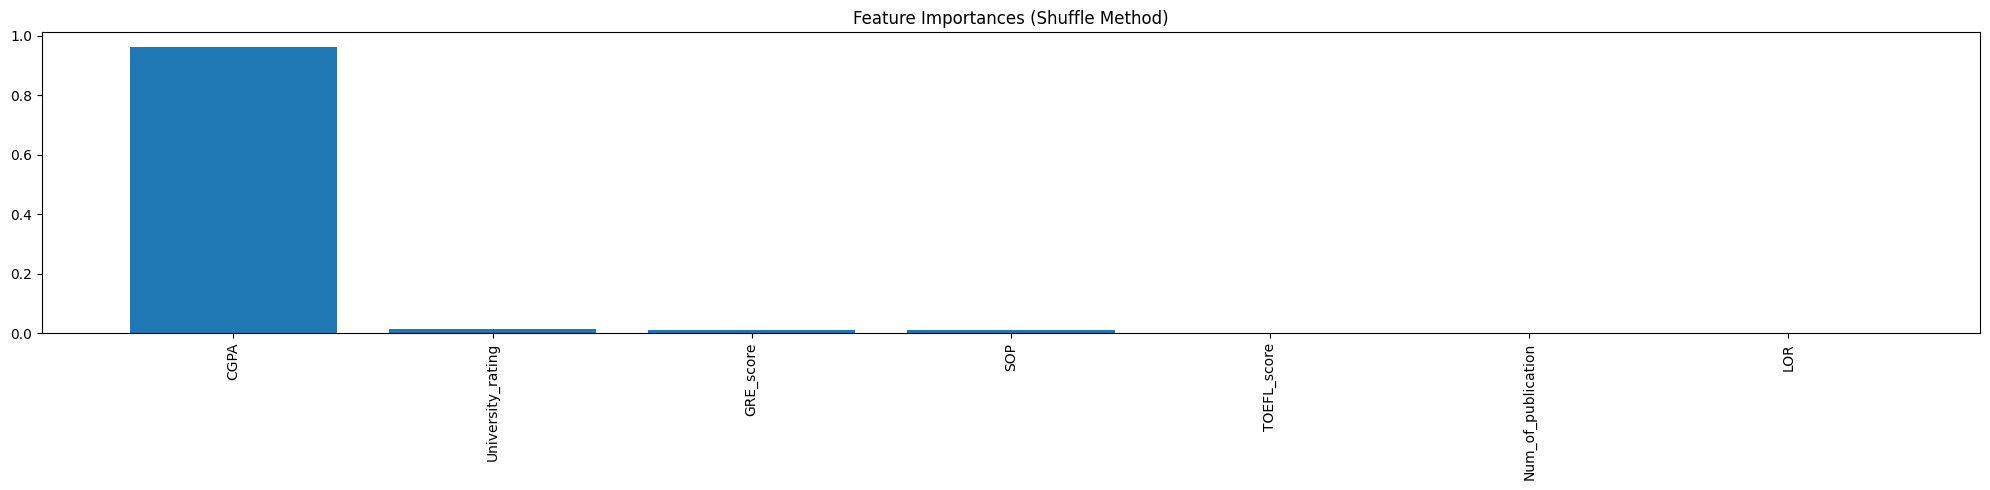

In [145]:
importances = importance
feature_names = list(feat.columns)
plot_feature_importances(importances, feature_names)

#### CGPA

In [ ]:
def convert_cgpa():
    cgpa = float(input('Enter your current CGPA: '))
    scale = float(input('Enter the grading scale according to your university: '))

    cal_cgpa = (cgpa / scale) * 10
    return cal_cgpa  

In [ ]:
convert_cgpa()